## iris 데이터를 2차원에서 분류

iris 데이터의 feature 는 4개

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris(as_frame = True)
print('iris.keys = ', iris.keys())

iris.keys =  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
X = iris.data.values
y = iris.target.values
X_scaled = StandardScaler().fit_transform(X)

In [8]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X_scaled)

principalDF = pd.DataFrame(pca_result, columns = ["PC1", "PC2"])
finalDF = pd.concat([principalDF, iris.target], axis = 1)

finalDF.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


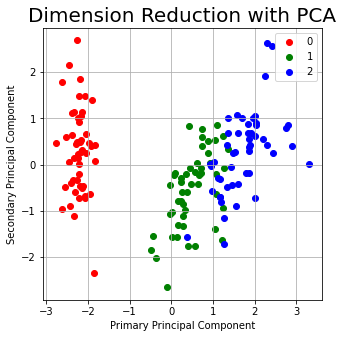

In [10]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Primary Principal Component")
ax.set_ylabel("Secondary Principal Component")
ax.set_title("Dimension Reduction with PCA", fontsize = 20)

targets = [0, 1, 2]
colors = ["r", "g", "b"]

for target, color in zip(targets, colors):
    idx = finalDF["target"] == target
    ax.scatter(finalDF.loc[idx, "PC1"], finalDF.loc[idx, "PC2"], c = color)
ax.legend(targets)
ax.grid()

## PCA를 이용한 유방암 데이터셋 시각화

breast_cancer 데이터의 feature 는 30개

In [11]:
cancer = load_breast_cancer(as_frame = True)

X_scaled = StandardScaler().fit_transform(cancer.data)

In [12]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X_scaled)
principalDF = pd.DataFrame(pca_result, columns = ["PC1", "PC2"])
finalDF = pd.concat([principalDF, cancer.target], axis = 1)
finalDF.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


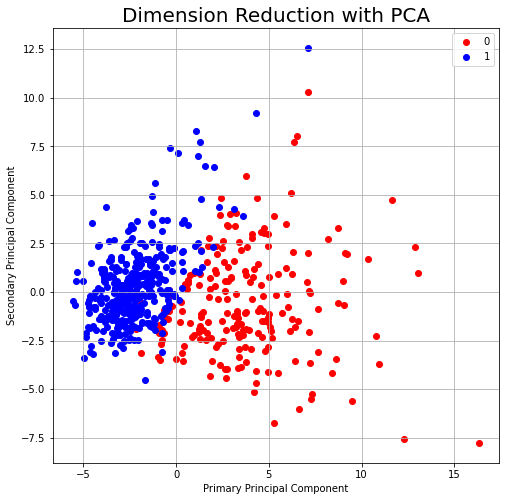

In [13]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Primary Principal Component")
ax.set_ylabel("Secondary Principal Component")
ax.set_title("Dimension Reduction with PCA", fontsize = 20)

targets = [0, 1]
colors = ["r", "b"]

for target, color in zip(targets, colors):
    idx = finalDF["target"] == target
    ax.scatter(finalDF.loc[idx, "PC1"], finalDF.loc[idx, "PC2"], c = color)
ax.legend(targets)
ax.grid()

In [19]:
print('주성분 형태 :', pca.components_.shape)

주성분 형태 : (2, 30)


## 주성분을 추출하여 이미지 압축

28 X 28 크기의 이미지는 픽셀을 한 줄로 나열하면 784차원의 벡터라 볼 수 있다. 이 이미지들로부터 100개의 주성분을 추출하고, 이 주성분이 표현하는 공간으로 투영하면 100차원의 데이터로 축소된다. 이러한 방식으로 이미지를 압축해보자.

## keras 가 제공하는 fashion mnist 데이터의 사용

In [21]:
#!pip install tensorflow

In [23]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [24]:
def plot_images(nrow, ncol, img, cmap = "gray"):
    fig = plt.figure()
    fig, ax = plt.subplots(nrow, ncol, figsize = (ncol, nrow))
    for i in range(nrow):
        for j in range(ncol):
            if nrow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i * ncol + j], cmap = cmap)

<Figure size 432x288 with 0 Axes>

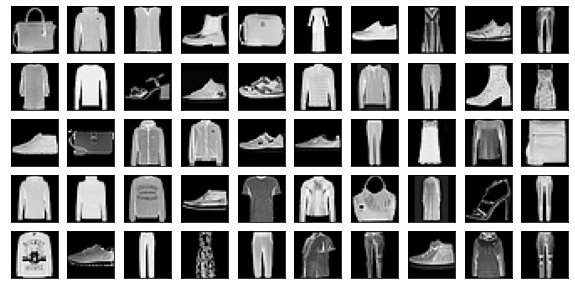

In [25]:
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx: rndinx + 50]
plot_images(5, 10, samples)

In [26]:
train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 100)
train_reduced = pca.fit_transform(train_images_flat)

<Figure size 432x288 with 0 Axes>

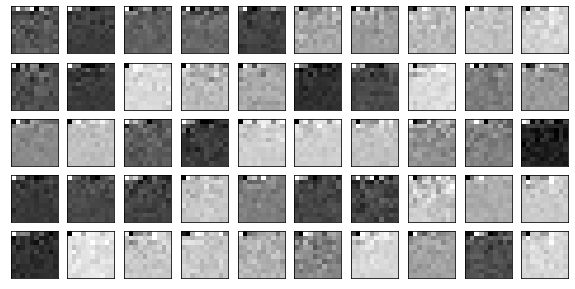

In [27]:
reduced_images = train_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx: rndinx + 50])

<Figure size 432x288 with 0 Axes>

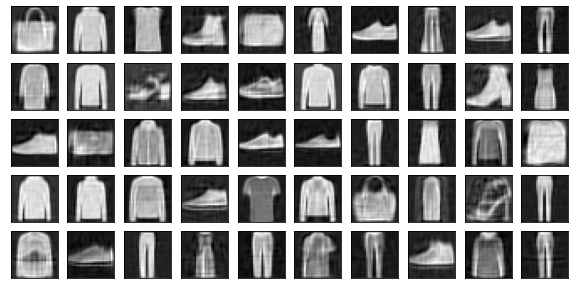

In [28]:
# 압축된 이미지의 복원
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx: rndinx + 50])

<Figure size 432x288 with 0 Axes>

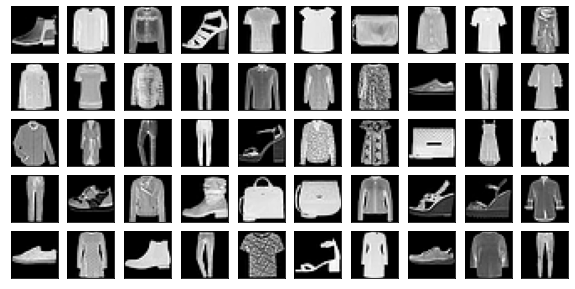

In [29]:
# 테스트 데이터에 적용
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx: rndinx + 50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

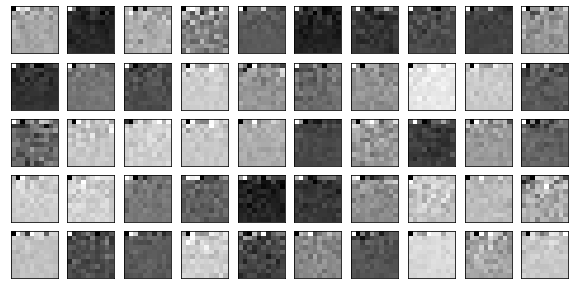

In [30]:
test_images_flat = test_images.reshape(-1, 28*28)
pca = PCA(n_components = 100)
test_reduced = pca.fit_transform(test_images_flat)

reduced_images = test_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx: rndinx + 50])

<Figure size 432x288 with 0 Axes>

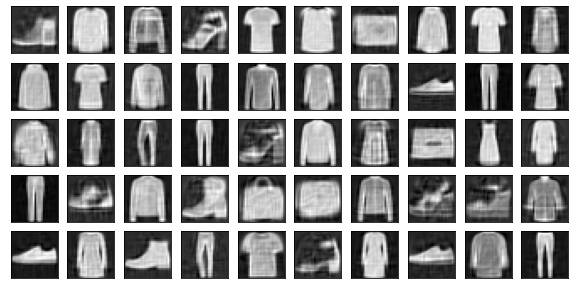

In [33]:
recovered_images = pca.inverse_transform(test_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx: rndinx + 50])

<Figure size 432x288 with 0 Axes>

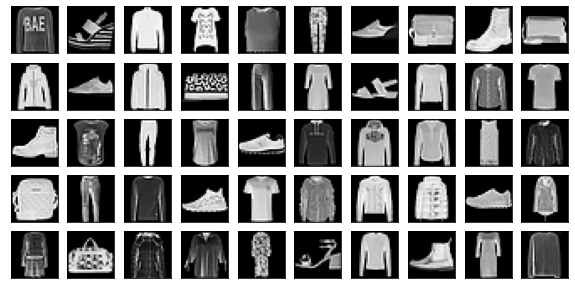

<Figure size 432x288 with 0 Axes>

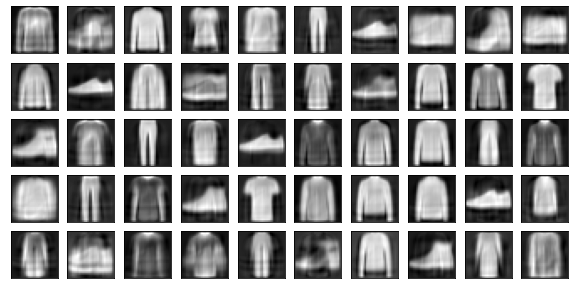

In [34]:
# 5 X 5의 매우 작은 크기로 압축한다면?
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx: rndinx + 50]
plot_images(5, 10, samples)

train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 25) # 5 X 5

train_reduced = pca.fit_transform(train_images_flat)
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx: rndinx + 50])

#### 코드참조

- 으뜸 데이터 분석과 머신러닝
- 파이썬 라이브러리를 활용한 머신러닝
- 으뜸 머신러닝